# Practical Homework 1 - Linear Regression

Student Number: 400105003

Student Name: Niki Sepasian

# Phase 0: Intro

For this assignment, you'll be given a dataset containing some features of a group of people. Given those features, you will try to predict how much they tend to spend on the medical services they receive.

In [1]:
# run this cell to download the dataset
!wget -O /kaggle/working/dataset.csv "https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1"

--2023-11-11 10:05:19--  https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc972b44e5262323d7daa030f9b8.dl.dropboxusercontent.com/cd/0/inline/CHWgfxbJIjAtMXbhCySisJONmHiWGPlMr6ky8h7RY_l4Dh08tJhLfm2rWBnKyuehnzm73S3-r5vm9AryHFgXQmBOGZ2Lx_IZJ_p5CCc9ioGNbUkuvjN0EHOZnvxRhcMLEi6OHH7y17_fAoDmR6v8U078/file?dl=1# [following]
--2023-11-11 10:05:20--  https://uc972b44e5262323d7daa030f9b8.dl.dropboxusercontent.com/cd/0/inline/CHWgfxbJIjAtMXbhCySisJONmHiWGPlMr6ky8h7RY_l4Dh08tJhLfm2rWBnKyuehnzm73S3-r5vm9AryHFgXQmBOGZ2Lx_IZJ_p5CCc9ioGNbUkuvjN0EHOZnvxRhcMLEi6OHH7y17_fAoDmR6v8U078/file?dl=1
Resolving uc972b44e5262323d7daa030f9b8.dl.dropboxusercontent.com (uc972b44e5262323d7daa030f9b8.dl.dropboxusercontent.com)... 162

In [2]:
# libraries that you allowed to use
import os
import pandas
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

# Phase 1: Explore

## Sec 1: Load and Explore **(P1-Sec1: 15 points)**

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe.

In [3]:
df= pd.read_csv("dataset.csv")
df.head(5)

,age,sex,bmi,children,smk,region,target
0,46,female,19.95,2,no,northwest,9193.83850
1,47,female,24.32,0,no,northeast,8534.67180
2,52,female,24.86,0,no,southeast,27117.99378
3,39,female,34.32,5,no,southeast,8596.82780
4,54,female,21.47,3,no,northwest,12475.35130


Print the names of the columns and the number of rows of the dataset **(P1-1-1: 2 points)**

In [4]:
print(df.columns)
print(df.shape[0])

Index(['age', 'sex', 'bmi', 'children', 'smk', 'region', 'target'], dtype='object')
1070


Get a brief description of the dataset **(P1-1-2: 2 points)**

In [5]:
df.describe()

,age,bmi,children,target
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


Check for missing values in the dataset **(P1-1-3: 2 points)**

In [6]:
print(df.isnull().sum())
df.isnull()

age         0
sex         0
bmi         0
children    0
smk         0
region      0
target      0
dtype: int64


,age,sex,bmi,children,smk,region,target
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1065,False,False,False,False,False,False,False
1066,False,False,False,False,False,False,False
1067,False,False,False,False,False,False,False
1068,False,False,False,False,False,False,False


Use Histograms and Box-plots to visualize the distribution of numerical columns **(P1-1-4: 2 points)**

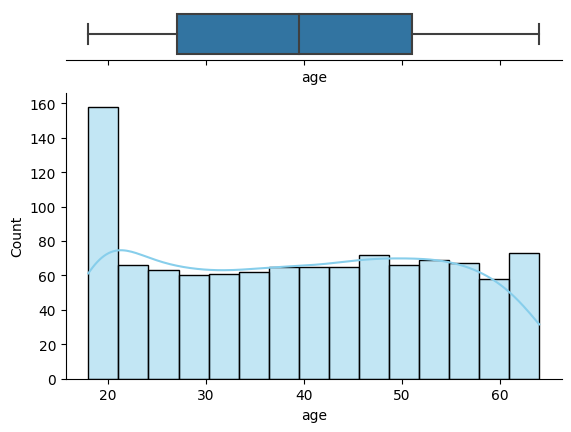

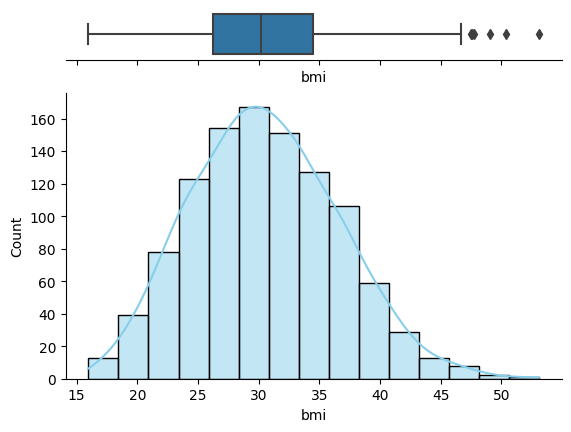

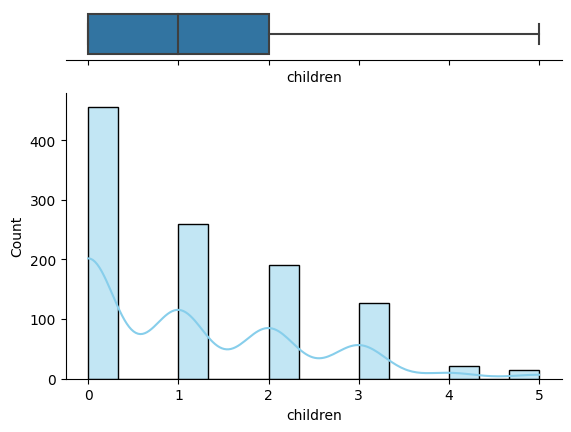

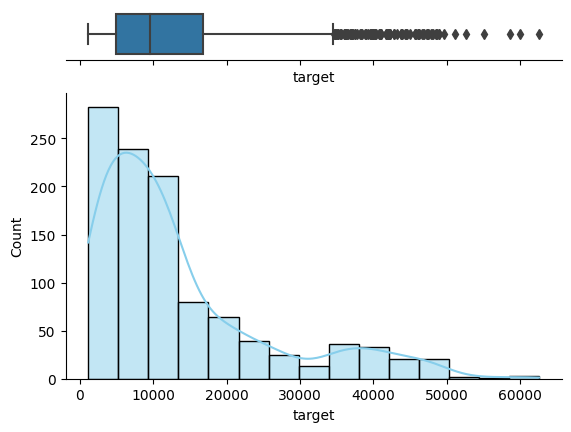

In [7]:
for col in df.select_dtypes(include='number'):
    f, (box, hist)= plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=df[col], ax=box)
    sns.histplot(x=df[col], bins=15, kde=True, ax=hist, color="skyblue")
    box.set(yticks=[])
    
    sns.despine(ax=hist)
    sns.despine(ax=box, left=True)


Count the number of unique values for each class in categorical columns and compare the distributions amongst them **(P1-1-5: 5 points)**

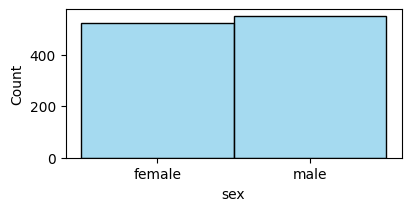

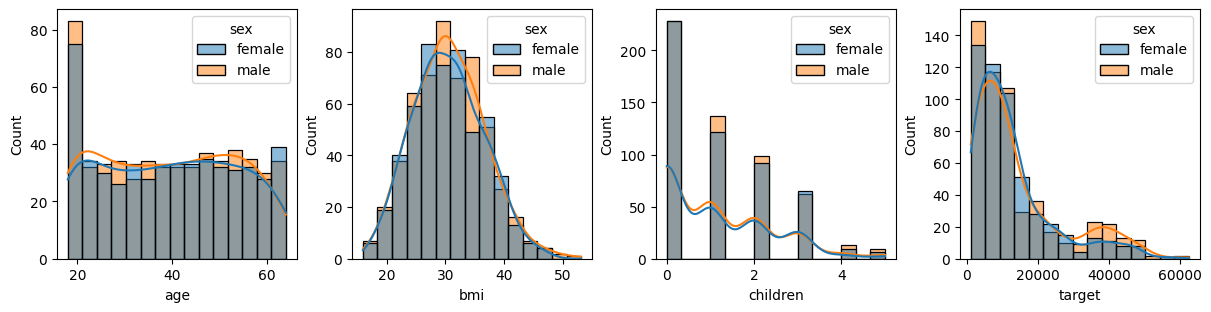

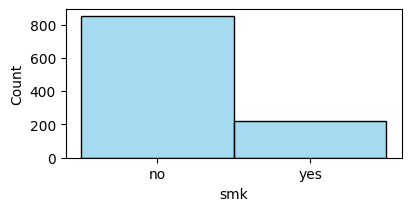

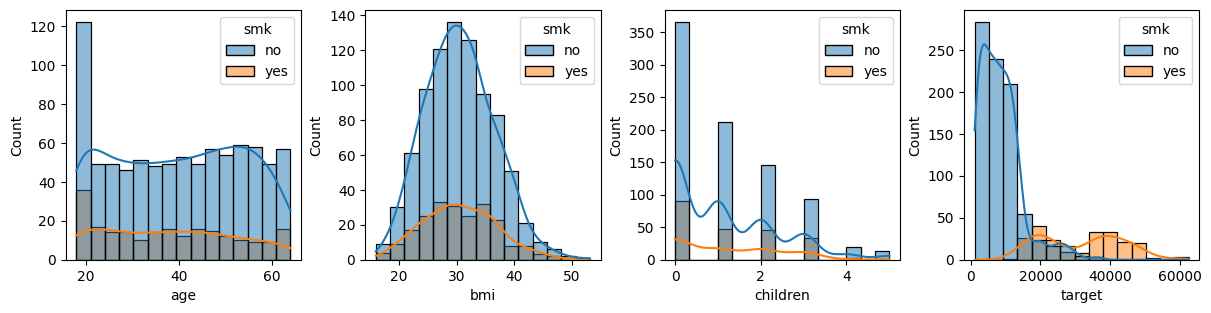

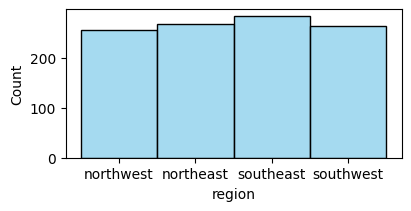

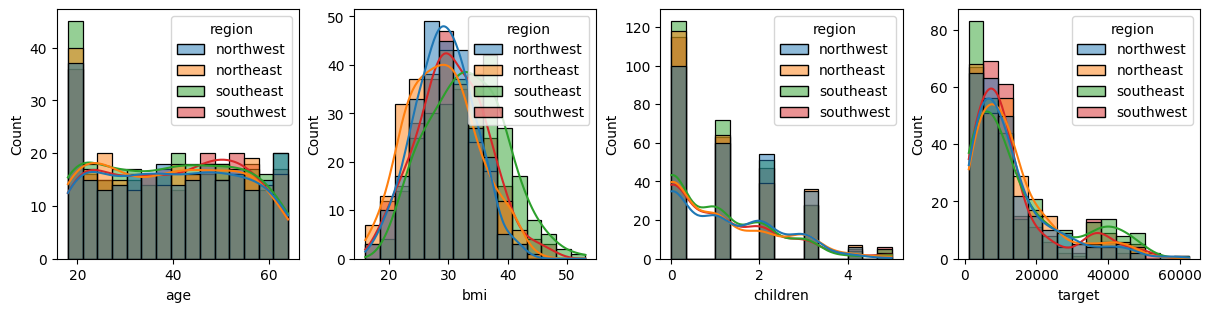

In [8]:
categorical_cols= df.select_dtypes(exclude='number')
numerical_cols= df.select_dtypes(include='number')

for cat in categorical_cols:
    plt.figure(figsize=(4, 2), layout= 'constrained')
    plt.subplot(1,1,1)
    sns.histplot(x=cat, data=df, color='skyblue')
    
    plt.figure(figsize=(12, 8), layout= 'constrained')
    count=1
    for num in numerical_cols:
        plt.subplot(categorical_cols.shape[1], numerical_cols.shape[1], count)
        sns.histplot(df, x=num, bins=15, kde=True, hue=cat)
        #sns.displot(df, x="bmi", bins=15, kde=True, col="sex")
        count+=1
    plt.show()
        

# stack or normal or dodge or seperate plots ????????????????
#count????

Convert columns with string values (`sex`, `smk`, and `region`) into numerical values **(P1-1-6: 2 points)**

In [9]:
df['sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['smk'].replace(['no', 'yes'], [0, 1], inplace=True)
df['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0, 1, 2, 3], inplace=True)

df.head(5)

,age,sex,bmi,children,smk,region,target
0,46,1,19.95,2,0,1,9193.83850
1,47,1,24.32,0,0,0,8534.67180
2,52,1,24.86,0,0,2,27117.99378
3,39,1,34.32,5,0,2,8596.82780
4,54,1,21.47,3,0,1,12475.35130


## Sec 2: Check for linear relation **(P1-Sec2: 10 points)**

Plot `age` and `smk` against `target` **(P1-2-1: 5 points)**

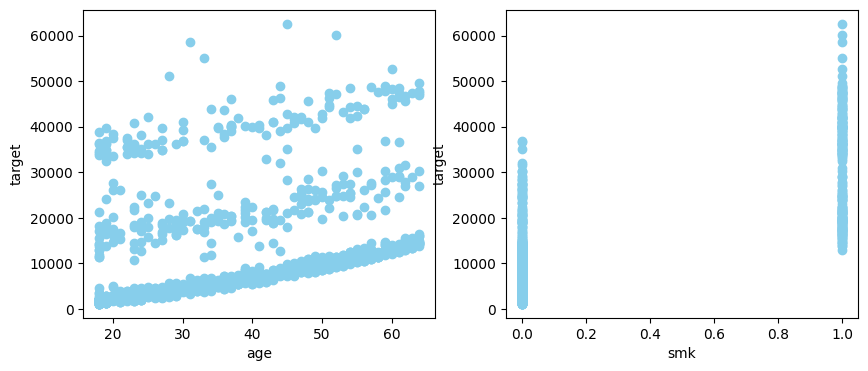

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(x=df.age, y=df.target, color='skyblue')
plt.xlabel("age")
plt.ylabel("target")

plt.subplot(1, 2, 2)
plt.scatter(x=df.smk, y=df.target, color='skyblue')
plt.xlabel("smk")
plt.ylabel("target")

plt.show()

Plot the correlation matrix for numerical features **(P1-2-2: 5 points)**

<Axes: >

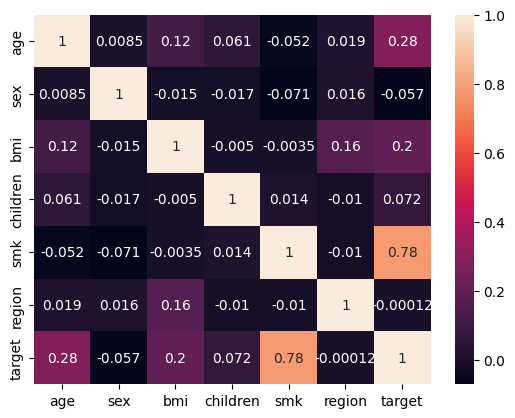

In [11]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='rocket')

# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables **(P2-Sec1: 15 points)**

Using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)
<br>
One-hot encoding is a method for converting categorical data to numerical ones that can be fed into a model. This method works by creating a binary vector for each category. **(P2-1-1: 5 points)**

In [12]:
one_hot_encoded_df= pd.get_dummies(data=df, columns=['region'], dtype=int)
one_hot_encoded_df

,age,sex,bmi,children,smk,target,region_0,region_1,region_2,region_3
0,46,1,19.950,2,0,9193.83850,0,1,0,0
1,47,1,24.320,0,0,8534.67180,1,0,0,0
2,52,1,24.860,0,0,27117.99378,0,0,1,0
3,39,1,34.320,5,0,8596.82780,0,0,1,0
4,54,1,21.470,3,0,12475.35130,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1065,18,1,31.350,4,0,4561.18850,1,0,0,0
1066,39,1,23.870,5,0,8582.30230,0,0,1,0
1067,58,0,25.175,0,0,11931.12525,1,0,0,0
1068,37,1,47.600,2,1,46113.51100,0,0,0,1


Do the same thing for the `smoker` and `sex` variable (the result should be a dataframe) **(P2-1-1: 10 points)**

In [13]:
one_hot_encoded_df= pd.get_dummies(data=one_hot_encoded_df, columns=['smk'], dtype=int)
one_hot_encoded_df= pd.get_dummies(data=one_hot_encoded_df, columns=['sex'], dtype=int)
one_hot_encoded_df

,age,bmi,children,target,region_0,region_1,region_2,region_3,smk_0,smk_1,sex_0,sex_1
0,46,19.950,2,9193.83850,0,1,0,0,1,0,0,1
1,47,24.320,0,8534.67180,1,0,0,0,1,0,0,1
2,52,24.860,0,27117.99378,0,0,1,0,1,0,0,1
3,39,34.320,5,8596.82780,0,0,1,0,1,0,0,1
4,54,21.470,3,12475.35130,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,18,31.350,4,4561.18850,1,0,0,0,1,0,0,1
1066,39,23.870,5,8582.30230,0,0,1,0,1,0,0,1
1067,58,25.175,0,11931.12525,1,0,0,0,1,0,1,0
1068,37,47.600,2,46113.51100,0,0,0,1,0,1,0,1


## Sec 2: Normalization **(P2-Sec2: 10 points)**

Normalize the columns `age`, `bmi`, and `children`. After this process, they should take values between 0 and 1. **(P2-2: 10 points)**

In [14]:
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

normalized_df= one_hot_encoded_df
normalized_df['age']= normalize(normalized_df['age'])
normalized_df['bmi']= normalize(normalized_df['bmi'])
normalized_df['children']= normalize(normalized_df['children'])
normalized_df

,age,bmi,children,target,region_0,region_1,region_2,region_3,smk_0,smk_1,sex_0,sex_1
0,0.608696,0.107345,0.4,9193.83850,0,1,0,0,1,0,0,1
1,0.630435,0.224913,0.0,8534.67180,1,0,0,0,1,0,0,1
2,0.739130,0.239440,0.0,27117.99378,0,0,1,0,1,0,0,1
3,0.456522,0.493947,1.0,8596.82780,0,0,1,0,1,0,0,1
4,0.782609,0.148238,0.6,12475.35130,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,4561.18850,1,0,0,0,1,0,0,1
1066,0.456522,0.212806,1.0,8582.30230,0,0,1,0,1,0,0,1
1067,0.869565,0.247915,0.0,11931.12525,1,0,0,0,1,0,1,0
1068,0.413043,0.851224,0.4,46113.51100,0,0,0,1,0,1,0,1


# Phase 3: Training

## Sec 1: Preparing features and Targets **(P3-Sec1: 5 points)**

Extract only the features from the dataframe by removing the `target` column. <br>
Note: Do not remove the previous dataframe.

In [15]:
features_df= normalized_df.drop('target', axis='columns')
features_df

,age,bmi,children,region_0,region_1,region_2,region_3,smk_0,smk_1,sex_0,sex_1
0,0.608696,0.107345,0.4,0,1,0,0,1,0,0,1
1,0.630435,0.224913,0.0,1,0,0,0,1,0,0,1
2,0.739130,0.239440,0.0,0,0,1,0,1,0,0,1
3,0.456522,0.493947,1.0,0,0,1,0,1,0,0,1
4,0.782609,0.148238,0.6,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1,0,0,0,1,0,0,1
1066,0.456522,0.212806,1.0,0,0,1,0,1,0,0,1
1067,0.869565,0.247915,0.0,1,0,0,0,1,0,1,0
1068,0.413043,0.851224,0.4,0,0,0,1,0,1,0,1


Convert the new dataframe into a numpy array **(P3-1-1: 3 points)**

In [16]:
x= features_df.to_numpy()
x

array([[0.60869565, 0.10734463, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 1.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 1.        ,
        0.        ]])

Get the `target` column from the previous dataframe and convert it to another numpy array named `y` **(P3-1-2: 2 points)**

In [17]:
y= normalized_df['target'].to_numpy()
y

array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931.12525,
       46113.511  , 10214.636  ])

## Sec 2: Splitting the Data **(P3-Sec2: 5 points)**

Split the dataset into two parts such that the training set (denoted as `x_train` and ‍`y_train`), contains 80% of the samples. **(P3-2: 5 points)**

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

## Sec 3: Linear Regression from Scratch **(P3-Sec3: 10 points)**

Complete this section with your code. **(P3-3: 10 points)**

In [19]:
class MyLinearRegression:
    def __init__(self):
        self.iteration_count= 10000
        self.learning_rate= 0.01
        self.w= None
        self.b= None

    def fit(self, x, y):
        
        sample_count, feature_count= x.shape
        self.w= np.zeros(feature_count)
        self.b= 0
        
        for i in range(self.iteration_count):
            y_pred= self.predict(x)
            
            dw = -(2*np.dot(x.T, y-y_pred))/ sample_count 
            db = -2*np.sum(y-y_pred)/ sample_count  

            self.w -= self.learning_rate*dw 
            self.b -= self.learning_rate*db 


    def predict(self, x):
        return (np.dot(x, self.w) + self.b)

## Sec 4: Fit the model to training data **(P3-Sec4: 10 points)**

Fit a linear regressor to the data. (Use both regressors - sklearn & from scratch) **(P3-4-1: 2 points)**

In [20]:
from sklearn.linear_model import LinearRegression

sklearn_regressor = LinearRegression()
scratch_regressor=MyLinearRegression()

sklearn_regressor.fit(x_train, y_train)
scratch_regressor.fit(x_train, y_train)

Get the coefficients of the variables (sklearn) **(P3-4-2: 3 points)**

In [21]:
coeffs= {}
i=0
for coef in sklearn_regressor.coef_:
    coeffs[features_df.columns.values[i]]= coef
    i+=1
    
print(coeffs)

{'age': 11663.140682633319, 'bmi': 12631.496575775333, 'children': 2514.6528719562334, 'region_0': 534.9286194217729, 'region_1': 20.23176919826389, 'region_2': -115.09588194824892, 'region_3': -440.0645066717884, 'smk_0': -11848.835488273662, 'smk_1': 11848.835488273664, 'sex_0': 2.3121474348237143, 'sex_1': -2.3121474348252207}


Get the score value of sklearn regressor on train dataset (sklearn) **(P3-4-3: 5 points)**

In [22]:
print(sklearn_regressor.score(x_train, y_train))


0.7353868269527727


# Phase 4: Evaluation

## Sec 1: Evaluate both models and compare the results **(P4-Sec1: 20 points)**

Predict the value of "y" for each "x" belonging to the "testing" set (use both regressors) **(P4-1-1: 10 points)**

In [23]:
sklearn_pred= sklearn_regressor.predict(x_test)
scratch_pred= scratch_regressor.predict(x_test)


Compute the mean squared error **(P4-1-2: 5 points)**

In [24]:
from sklearn.metrics import mean_squared_error
 
print("sklearn model mse: ", mean_squared_error(y_test, sklearn_pred))
print("scratch model mse: ", mean_squared_error(y_test, scratch_pred))

sklearn model mse:  31895890.93491925
scratch model mse:  31893220.15130375


Calculate the maximum error for each regressor **(P4-1-3: 5 points)**

In [25]:
print("sklearn model max error: ", np.max(np.subtract(y_test, sklearn_pred)))
print("scratch model max error: ", np.max(np.subtract(y_test, scratch_pred)))

sklearn model max error:  20406.410623339427
scratch model max error:  20394.691477648703


# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: WILL BE ADDED IN THE NEXT FEW DAYS<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>